# Trabajo práctico Nº7: Medio interestelar

Ayuda para los trabajos prácticos de Sistemas Estelares.

Notebook creada por Tomás Ansin (2021) y modificada por G. Ferrero (2022)


### 1. a) Descargue del Classroom el archivo $\texttt{polarizacion.dat}$ que contiene los datos de polarización en la banda R de un conjunto de estrellas en el campo del *blazar* 1ES 1959+650 (ver [Sosa et al. 2017; S17](https://ui.adsabs.harvard.edu/abs/2017A%26A...607A..49S)).
### b) Usando las ecuaciones (1), (2) y (3) de S17, calcule la polarización $(P)$ y el ángulo de polarización observado $(\theta_{obs})$.
### Tome en cuenta que es necesario corregir los ı́ndices de Stokes observados ($Q_{obs}$ y $U_{obs}$) por la polarización instrumental ($Q_{ins}$ y $U_{ins}$), de acuerdo a las relaciones
### $Q = Q_{obs} - Q_{ins}$
#### y
### $U = U_{obs} - U_{ins}$
### donde $Q_{ins} = 0.029\; \%$ y $U_{ins} = 0.015\: \%$.
### Lleve los ángulos de polarización observados al sistema estándar, aplicando la corrección
### $\theta_s = \theta_{obs} + \Delta\theta$,
### donde $\Delta\theta = 175.1^\circ$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from astropy.io import fits                        # en esta práctica usaremos algunas tareas de astropy 
from astropy.visualization import ZScaleInterval
plt.style.use('sisest.mplstyle')

In [2]:
# comencemos observando el contenido del archivo polarizacion.dat
# podemos hacerlo aquí con !head o abrirlo aparte con el editor
# notemos que en los comentarios explica los títulos de cada columna

!head -n 15 polarizacion.dat

# Datos practica 7 Sistemas Estelares. Tomados de Sosa et al. 2017
#
# abreviaturas columnas: est. = estrella
# F = flujo, e = error
# 000, 225, 450, 675 = angulos 0.00, 22.5, 45.0 y 67.5 grados respectivamente
# O = rayo ordinario, E = extraordinario
#
# ejemplo: F225O = flujo rayo ordinario, ángulo 22.5 grados
#
#
est F000O         eF000O        F000E         eF000E        F225O         eF225O        F225E         eF225E        F450O         eF450O        F450E         eF450E         F675O        eF675O        F675E         eF675E
#1     2             3             4             5              6            7             8              9            10            11            12            13             14           15            16            17
01     63339.99      169.1867      61979.75      165.5533       59185.4      163.5408      69313.04       178.757      59548.88      164.5451      61562.24      164.4381       61293.3      163.7198      54397.06      155.32
02     90987.65  

In [3]:
# importamos la tabla de datos, indicando como índice la columna est (estrella)

tpol = pd.read_csv('polarizacion.dat', sep='\s+', header=0, comment='#', index_col='est')
tpol.head()


,F000O,eF000O,F000E,eF000E,F225O,eF225O,F225E,eF225E,F450O,eF450O,F450E,eF450E,F675O,eF675O,F675E,eF675E
est,,,,,,,,,,,,,,,,
1,63339.99,169.1867,61979.75,165.5533,59185.40,163.5408,69313.04,178.7570,59548.88,164.5451,61562.24,164.4381,61293.30,163.7198,54397.06,155.3200
2,90987.65,201.1332,92944.80,205.4596,90718.48,200.5382,95376.17,202.0495,89120.63,197.0061,88626.74,195.9143,84734.56,195.1150,82210.98,189.3041
3,39820.62,135.7063,41050.94,136.1181,40698.08,134.9480,41580.17,137.8729,38958.57,132.7684,39200.53,133.5930,36575.31,128.0153,37268.02,130.4398
4,453849.30,459.8270,455122.40,461.1169,452673.60,458.6359,455546.70,461.5468,464628.60,470.7483,453932.50,459.9113,465767.30,471.9020,462519.30,468.6112
5,115955.90,224.2860,117528.40,227.3276,117293.10,226.8725,119420.60,230.9876,110972.80,224.8690,110527.00,223.9656,104176.80,211.0979,102750.40,217.6715


In [4]:
# calculamos las expresiones R_Q^2 y R_U^2

rq2 = (tpol.F000O / tpol.F000E) / (tpol.F450O / tpol.F450E) # completar
ru2 = (tpol.F225O / tpol.F225E) / (tpol.F675O / tpol.F675E) # completar

# luego R_Q y R_U

rq = np.sqrt(rq2) # completar
ru = np.sqrt(ru2) # completar

# después los índices de Stokes observados: Q_obs y U_obs

qobs = (rq-1)/(rq+1) # completar
uobs = (ru-1)/(ru+1) # completar

# ahora corregimos por la polarización instrumental (recordemos que está dada en porcentajes)

qins = 0.029/100. # completar
uins = 0.015/100. # completar
qcorr = qobs - qins # completar
ucorr = uobs - uins # completar

# y por último calculamos la polarización (recordemos que suele expresarse en porcentaje)

p = np.sqrt(qcorr**2 + ucorr**2) # completar 

# ahora calculamos el ángulo de polarización y lo pasamos al sistema estándar (Norte = 0°, Este = 90°)
# atención a calcular el arcotangente usando la función adecuada, que elija bien los cuadrantes

thetaobs = 0.5*np.arctan2(ucorr,qcorr)*180./np.pi # completar
dtheta = 175.1 # completar
thetastd = thetaobs + dtheta # completar

thetastd, p*100. # p en porcentaje. el que tiene p=7.06 es el blazar, es una polarización muy grande.

(est
 1     135.586191
 2     120.553923
 3      88.779793
 4      98.633197
 5     115.119175
 6      95.236323
 7     107.593218
 8     151.651655
 9     134.289220
 10    121.595025
 11    131.026639
 12    226.202935
 dtype: float64,
 est
 1     7.066052
 2     2.140003
 3     0.640201
 4     0.765056
 5     0.933845
 6     0.811145
 7     1.007299
 8     0.957800
 9     1.594622
 10    2.775871
 11    2.411773
 12    1.151963
 dtype: float64)

In [5]:
np.arctan2?

Call signature:  np.arctan2(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'arctan2'>
File:            /data0/sw/anaconda3/lib/python3.8/site-packages/numpy/__init__.py
Docstring:      
arctan2(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Element-wise arc tangent of ``x1/x2`` choosing the quadrant correctly.

The quadrant (i.e., branch) is chosen so that ``arctan2(x1, x2)`` is
the signed angle in radians between the ray ending at the origin and
passing through the point (1,0), and the ray ending at the origin and
passing through the point (`x2`, `x1`).  (Note the role reversal: the
"`y`-coordinate" is the first function parameter, the "`x`-coordinate"
is the second.)  By IEEE convention, this function is defined for
`x2` = +/-0 and for either or both of `x1` and `x2` = +/-inf (see
Notes for specific values).

This function is not defined for complex-valued arguments; for the
so-called argument of comp

Agregamos estos resultados a la tabla.

In [6]:
tpol['Q'] = qcorr        # completar
tpol['U'] = ucorr        # completar
tpol['P'] = p*100.       # completar (atención a guardarla en porcentaje)
tpol['theta'] = thetastd # completar
tpol.head()

,F000O,eF000O,F000E,eF000E,F225O,eF225O,F225E,eF225E,F450O,eF450O,F450E,eF450E,F675O,eF675O,F675E,eF675E,Q,U,P,theta
est,,,,,,,,,,,,,,,,,,,,
1,63339.99,169.1867,61979.75,165.5533,59185.40,163.5408,69313.04,178.7570,59548.88,164.5451,61562.24,164.4381,61293.30,163.7198,54397.06,155.3200,0.013449,-0.069369,7.066052,135.586191
2,90987.65,201.1332,92944.80,205.4596,90718.48,200.5382,95376.17,202.0495,89120.63,197.0061,88626.74,195.9143,84734.56,195.1150,82210.98,189.3041,-0.007000,-0.020223,2.140003,120.553923
3,39820.62,135.7063,41050.94,136.1181,40698.08,134.9480,41580.17,137.8729,38958.57,132.7684,39200.53,133.5930,36575.31,128.0153,37268.02,130.4398,-0.006349,-0.000820,0.640201,88.779793
4,453849.30,459.8270,455122.40,461.1169,452673.60,458.6359,455546.70,461.5468,464628.60,470.7483,453932.50,459.9113,465767.30,471.9020,462519.30,468.6112,-0.006813,-0.003481,0.765056,98.633197
5,115955.90,224.2860,117528.40,227.3276,117293.10,226.8725,119420.60,230.9876,110972.80,224.8690,110527.00,223.9656,104176.80,211.0979,102750.40,217.6715,-0.004664,-0.008090,0.933845,115.119175


### Guía para graficar imágenes y representar polarización

In [7]:
img_archivo ='vonC_0053_PRO.fits'     # asignamos a una variable el nombre del archivo fits que contiene la imagen
with fits.open(img_archivo) as hdul:  # Dentro del bloque with abrimos la imágen
    hdul.info()                       # miramos las HDU que contiene
    hdr = hdul[0].header              # Extraemos el header
    data = hdul[0].data               # y la imágen

Filename: vonC_0053_PRO.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     251   (1024, 1024)   float32   


Nota: la función open devuelve un objeto llamado HDUList que es una colección de objetos HDU, como si fuera una lista. Un HDU (Header Data Unit) es la componente de más alto nivel de la estructura de un archivo FITS. Consiste en un "header" y (típicamente) un arreglo de datos o una tabla.

#### Podemos mirar el *header* de la imagen para ver qué información contiene. 

In [8]:
hdr

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1024 / Axis length                                    
NAXIS2  =                 1024 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2012-05-27T19:59:39' / Date FITS file was generated                  
IRAF-TLM= '2012-06-23T15:37:06' / Time of last modification                     
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition do

#### Podemos observar también que la imagen es simplemente un arreglo de dos dimensiones.

In [9]:
data

array([[ 22.99694   ,  53.725594  ,  48.10227   , ...,  54.13777   ,
         58.255222  ,  61.11795   ],
       [  1.88227   ,  -3.6177027 ,   0.64826196, ...,  53.748287  ,
         62.398815  ,  65.43683   ],
       [ -1.091704  ,  -7.6309767 ,   1.5338818 , ..., 102.67521   ,
        120.3141    , 115.53665   ],
       ...,
       [  9.034159  ,  -8.166223  ,   1.7227762 , ..., 110.06919   ,
        108.07898   , 113.58318   ],
       [  6.579346  ,  -4.707735  ,   1.2774714 , ..., 114.18183   ,
        104.876045  , 116.47307   ],
       [  7.6381693 ,  -3.0065587 ,   4.172001  , ..., 114.26904   ,
        111.53864   , 116.35401   ]], dtype=float32)

#### Observemos qué sucede si graficamos esta matriz directamente, sin aplicar ninguna transformación (o escala). 

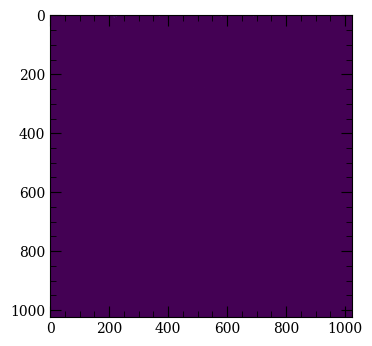

In [10]:
fig = plt.figure(dpi=100)
plt.imshow(data)          # imshow muestra los datos de un arreglo 2D como si fueran una imagen

#### Para poder ver la imagen debemos aplicarle una transformación (una escala) a los datos.
#### Usamos la escala ZScale, que está basada en la escala que usa el DS9


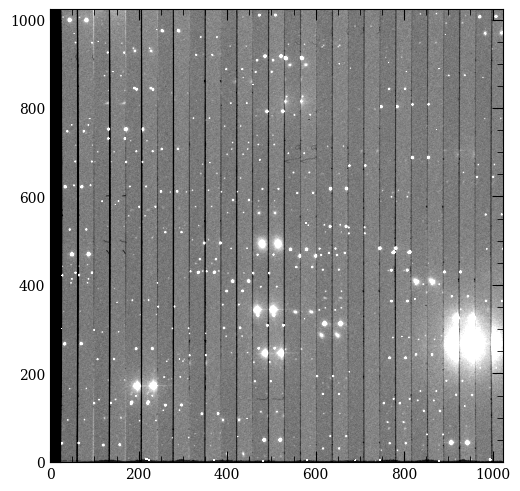

In [11]:
# El intervalo a representar (mínimo, máximo) estára definido por la función ZScaleInterval()
interval = ZScaleInterval()

# Calculamos los valores de intensidad mínima y máxima y los guardamos en variables 

valor_min, valor_max = interval.get_limits(data) 

# ahora graficamos otra vez, pero ahora solamente el rango elegido, usando un mapa de color en gris

fig = plt.figure(figsize=(6,6), dpi=100)
plt.imshow(data, 
           vmin = valor_min, 
           vmax = valor_max, 
           cmap='gray', origin='lower')
plt.show()

Lo que vemos es la suma de dos imágenes, una captura los rayos ordinarios y otra de los extraordinarios.

#### Para superponer vectores a esta imagen se puede utilizar quiver() de pyplot

#### A quiver hay que darle los vectores de la siguiente forma:

### plt.quiver(x, y, dx, dy, scale_units='xy', scale=1) 

#### Donde el par (x, y) es el origen del vector y dx, dy son las componentes en cada dirección respectivamente. Los orígenes de los vectores (o sea las posiciones de las estrellas, están en la tabla xy.dat) Los valores de dx y dy son **divididos** por el número "scale" 

In [12]:
!head xy.dat

#est. x       y
01    515.95  494.00
02    944.13   44.32
03    521.11   50.70
04    234.76  172.98
05    657.55  313.39
06    505.25  345.03
07    449.65  409.79
08     87.78  470.37
09     72.46  622.75


In [13]:
# primero importamos el archivo xy.dat con numpy y lo separamos en columnas
# así tenemos las posiciones de las estrellas

estre, x, y = np.loadtxt('xy.dat', unpack=True)

# para obtener las componentes de los vectores, proyectamos el vector de polarización sobre cada uno de los ejes

dx = tpol.P * np.cos( tpol.theta* np.pi/180.)# completar
dy = tpol.P * np.sin( tpol.theta* np.pi/180.)# completar

# convertimos el array con los números de las estrellas en un array de enteros
estre_int = estre.astype(int)


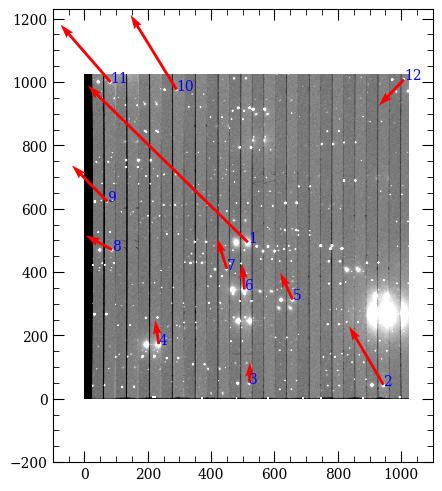

In [14]:
# graficamos los vectores superpuestos a la imagen

fig = plt.figure(figsize=(6,6), dpi=100)
plt.imshow(data, 
           vmin = valor_min, 
           vmax = valor_max, 
           origin='lower', cmap='gray')

plt.quiver(x, y, dx, dy, scale_units = 'xy', color = 'red', scale = 0.01)

# para poner etiquetas a los vectores
for nom in estre_int:
    posx = x[nom-1]
    posy = y[nom-1]
    plt.text(posx, posy, str(nom), fontsize=10, c='blue')
        
plt.xlim(-100,1100)
plt.ylim(-200, 1230)
plt.show()

In [15]:
# calculamos por primera vez el promedio y la desv. estándar de la polarización y de su ángulo
pmedio0 = tpol.P.mean() # completar
pdesv0 = tpol.P.std() # completar
print(pmedio0, pdesv0) # completar)

tet_medio0 = tpol.theta.mean()# completar
tet_desv0 = tpol.theta.std() # completar
print() # completar )

#calculamos el nro. de desviaciones estándar que cada dato se aparta del promedio
#ndesv_pol = np.abs(tpol.P - tpol.P.mean())/tpol.P.std <1 # completar
#ndesv_tet = np.abs(tpol.P - tpol.P.mean())/tpol.P.std <1 # completar


    
tpol.drop(1, inplace=True) #sin el inplace no queda guardado el cambio
tpol.drop(3, inplace=True)
tpol.drop(12, inplace=True)
print(tpol.head())

1.8546358070024083 1.78584815109466

         F000O    eF000O      F000E    eF000E      F225O     eF225O  \
est                                                                   
2     90987.65  201.1332   92944.80  205.4596   90718.48  200.53820   
4    453849.30  459.8270  455122.40  461.1169  452673.60  458.63590   
5    115955.90  224.2860  117528.40  227.3276  117293.10  226.87250   
6    429787.20  435.4480  433760.50  439.4736  425185.00  430.78520   
7     20050.30   97.8784   20367.27   97.5498   20299.36   97.22453   

         F225E     eF225E      F450O     eF450O      F450E     eF450E  \
est                                                                     
2     95376.17  202.04950   89120.63  197.00610   88626.74  195.91430   
4    455546.70  461.54680  464628.60  470.74830  453932.50  459.91130   
5    119420.60  230.98760  110972.80  224.86900  110527.00  223.96560   
6    430529.40  436.20000  435766.30  441.50580  427105.90  432.73140   
7     20844.01   99.83317  

In [16]:
print(tpol.P.mean(), tpol.P.std(), tpol.theta.mean(), tpol.theta.std())

1.488601492676941 0.7704296955678144 119.52204157642892 17.944084787222984


In [ ]:
# ahora graficamos los vectores que se apartan menos de 1 desv. estándar en P y theta

fig = plt.figure(figsize=(6,6), dpi=100)
plt.imshow(data, 
           vmin = valor_min, 
           vmax = valor_max, 
           origin='lower', cmap='gray')

plt.quiver(x[ # condición ], 
           y[# condición ], 
           dx[# condición ], 
           dy[# condición ], 
           scale_units = 'xy', color = 'red', scale = 0.01)

# para poner etiquetas a los vectores
for nom in estre_int:
    posx = x[nom-1]
    posy = y[nom-1]
    plt.text(posx, posy, str(nom), fontsize=10, c='blue')
        
plt.xlim(-100,1100)
plt.ylim(-200, 1230)
plt.show()

In [ ]:
# y calculamos un nuevo valor medio con los objetos que nos quedan

pmedio1 = # completar
pdesv1 = # completar
print( # completar)

tet_medio1 = # completar
tet_desv1 = # completar
print(# completar)


#### 2. En el archivo $\texttt{NGC6250\_pol.dat}$ se encuentran las medidas de polarización en las bandas fotométricas UBVRI de cuatro estrellas del cúmulo abierto NGC 6250. Verifique si es posible ajustar  la ley de Serkowski a dichas medidas. Cuando sea posible, obtenga los valores de la polarización máxima y su correspondiente longitud de onda, para cada caso. ¿Qué puede decir acerca del origen de la polarización medida?

#### En la ley de Serkowski, adopte un valor de $k = 1.15$ (típico para el medio interestelar en nuestra galaxia).

In [18]:
# importamos la tabla de datos
pol6250 = pd.read_csv('NGC6250_pol.dat', sep='\s+', header=None, comment='#',
                     names = ['fil', 'lam', 'P1', 'eP1', 'P3', 'eP3', 'P18', 'eP18', 'P19', 'eP19', 'P25', 'eP25'])
pol6250

,fil,lam,P1,eP1,P3,eP3,P18,eP18,P19,eP19,P25,eP25
0,U,3600,1.37,0.16,1.45,0.16,1.43,0.25,1.04,0.28,1.71,0.47
1,B,4400,1.56,0.14,1.64,0.19,2.00,0.22,1.02,0.21,1.93,0.12
2,V,5300,1.66,0.19,1.85,0.24,1.70,0.20,1.35,0.14,1.96,0.27
3,R,6900,1.67,0.14,1.78,0.17,2.31,0.14,1.03,0.14,1.87,0.20
4,I,8300,1.43,0.16,1.65,0.25,1.67,0.21,0.70,0.17,1.64,0.27


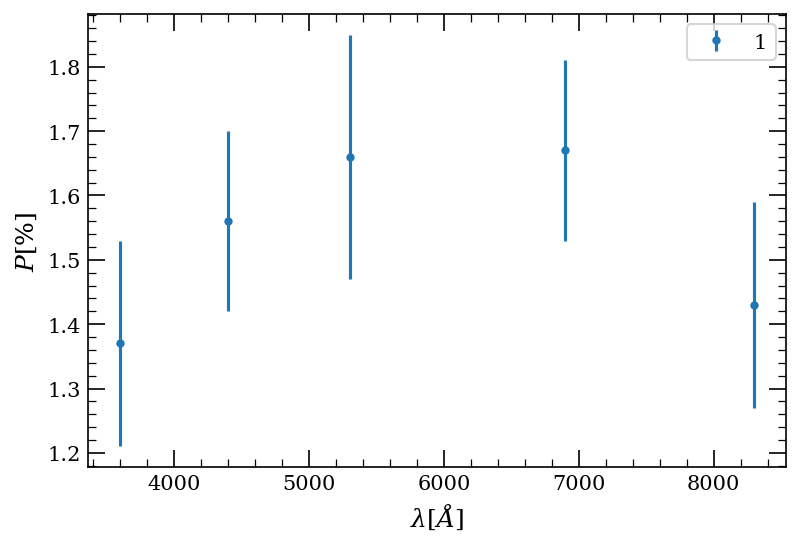

In [21]:
# graficamos los datos de la primera estrella

fig = plt.figure(figsize=(6,4), dpi=150)

plt.errorbar(pol6250.lam, pol6250.P1, yerr= pol6250.eP1, fmt = '.', label='1')# completar)

plt.xlabel('$\lambda$[$\AA$]')# completar)
plt.ylabel('$P$[%]') # completar)
plt.legend()

In [23]:
# definimos la función de Serkowski para el ajuste

def PS(lam,pmax,lmax) :
    k=1.15
    polariza = pmax*np.exp(-k*(np.log(lmax/lam))**2)# completar
    return polariza


In [24]:
# ajustamos
# en este caso es necesario darle valores iniciales a curve_fit

coef, cov = curve_fit(PS, pol6250.lam, pol6250.P1, sigma=pol6250.eP1,# el sigma marca los errores, p0 marca los valores iniciales (gráfico anterior)
                      p0 = [1.7,6000])# completar])    # valores iniciales
pmax1 = coef[0]# completar
lmax1 = coef[1]# completar
err_pmax1 = np.sqrt(cov[0,0])# completar
err_lmax1 = np.sqrt(cov[0,0])# completar
print(pmax1, err_pmax1)# completar)
print(lmax1, err_lmax1)# completar)

1.7062720690040971 0.018282209762172118
5692.50123430231 0.018282209762172118


In [25]:
# creamos un vector sobre el cual muestrear la función a graficar

longon = np.linspace(3500.,8500.,100)

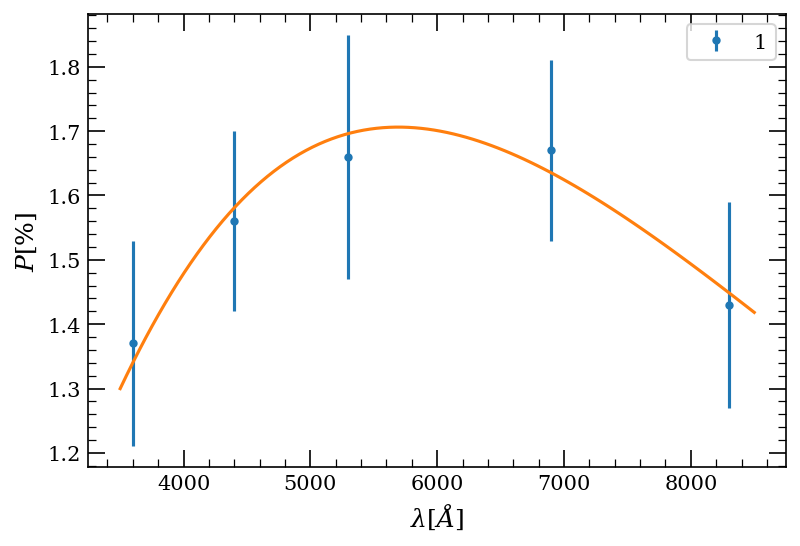

In [27]:
fig = plt.figure(figsize=(6,4), dpi=150)

plt.errorbar(pol6250.lam, pol6250.P1, yerr= pol6250.eP1, fmt = '.', label='1')# completar)
plt.plot(longon, PS(longon, pmax1, lmax1)) # completar)

plt.xlabel('$\lambda$[$\AA$]')# completar)
plt.ylabel('$P$[%]')# completar)
plt.legend()
plt.show()
# la ley de serkowsky representa a la polarización debida al medio interestelar. Si la polarización sigue esta curva, podemos decir que
# la polarización en esa estrella es debida a este factor. En otro caso no lo sería.

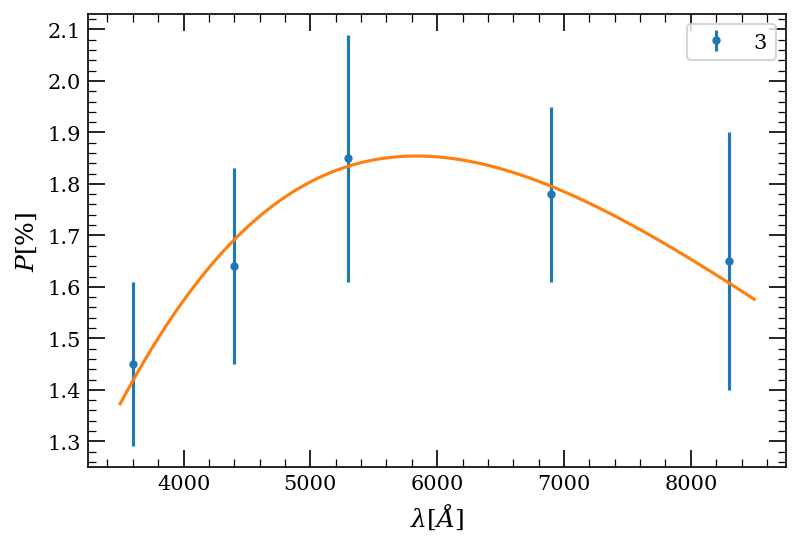

In [30]:
# conviene graficar una por una las estrellas con su ajustes y ver si tiene sentido
# REPETIR PARA LA ESTRELLA 3, 18, 19, 25
coef, cov = curve_fit(PS, pol6250.lam, pol6250.P3, sigma=pol6250.eP3, 
                      p0 = [1.7,6000])
pmax1 = coef[0]
lmax1 = coef[1]
err_pmax1 = np.sqrt(cov[0,0])
err_lmax1 = np.sqrt(cov[0,0])

fig = plt.figure(figsize=(6,4), dpi=150)

plt.errorbar(pol6250.lam, pol6250.P3, yerr= pol6250.eP3, fmt = '.', label='3')
plt.plot(longon, PS(longon, pmax1, lmax1))

plt.xlabel('$\lambda$[$\AA$]')
plt.ylabel('$P$[%]')
plt.legend()
plt.show()

### 3. En los alrededores del Sol, el gas interestelar difuso tiene una densidad del orden de 1 molécula cm$^{-3}$. Calcule hasta qué volumen sería necesario comprimir un cubo de gas interestelar de 30 km de lado para llevarlo a la densidad normal de la atmósfera terrestre ($6.02 \times 10^{23}$ moléculas en 22.4 litros). Comparar ambas densidades entre sí y con la del mejor vacío que se puede obtener con bombas de vacío.